In [1]:
#from findiff import FinDiff

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#from sympy import symbols, solve

In [3]:
pi = np.pi

In [4]:
"""Defining the template for the di and df vectors, in terms of a quenching parameter which perturbs the v and w values"""

v_quench_param = 2
w_quench_param = 6

#N = 1000
k = np.linspace(-pi , pi , 1000)
dk = k[1]-k[0]
t = np.linspace(0 , 4 , 1000)

def v(quench = False):
    v = 10
    if quench:
        return v + v_quench_param
    else:
        return v
    
def w(quench = False):
    w = 8
    if quench:
        return w + w_quench_param
    else:
        return w


In [5]:
"""Now constructing the actual di and df vectors"""

di_list = len(k)*[0.0]
df_list = len(k)*[0.0]

for i in range(len(k)):
    di_list[i] = [v() + w()*np.cos(k[i]) , -w()*np.sin(k[i])]
    df_list[i] = [v(quench=True) + w(quench=True)*np.cos(k[i]) , -w(quench=True)*np.sin(k[i])]

In [6]:
"""Converting the di and df lists to arrays for easy operation later"""

di = np.array(di_list)
df = np.array(df_list)

In [7]:
v(quench=True) + w(quench=True)*np.cos(-pi)

-2.0

In [8]:
# #plt.plot(np.array(di)[:,0])
# plt.plot(np.array(di_normed)[:,0])
# #plt.ylim(0.99999 , 1.00001)

In [9]:
"""Normalizing the di and df vectors"""

di_normed = np.zeros(np.shape(di))
df_normed = np.zeros(np.shape(df))

for i in range(len(di)):
    di_normed[i] = ( 1/np.sqrt(np.sum(di[i]**2)) ) * di[i]
    df_normed[i] = ( 1/np.sqrt(np.sum(df[i]**2)) ) * df[i]

Text(0.5, 1.0, 'Representation of d vectors in k-space')

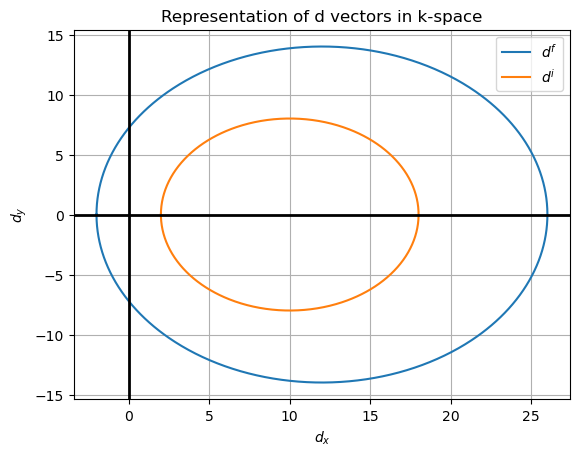

In [10]:
plt.plot(df[:,0] , df[:,1] , label = r"$d^f$")
plt.plot(di[:,0] , di[:,1] , label = r"$d^i$")
plt.xlabel(r'$d_{x}$')
plt.ylabel(r'$d_{y}$')
plt.axvline(linewidth = '2' , color = 'black')
plt.axhline(linewidth = '2' , color = 'black')
# plt.xlim(-6,6)
# plt.ylim(-6,6)
plt.grid()
plt.legend()
plt.title("Representation of d vectors in k-space")

In [11]:
# df_normed

In [12]:
"""defining cos(delta_k)"""

cos_delta_k = np.array(len(k)*[0.00])

for i in range(len(k)):
    cos_delta_k[i] = np.dot(di_normed[i] , df_normed[i])

In [13]:
"""Defining the energies as a function of k (dispersion relation)"""

Eik = np.array(len(k)*[0.00])
Efk = np.array(len(k)*[0.00])

for i in range(len(k)):
    Eik[i] = np.sqrt(np.sum(di[i]**2)) 
    Efk[i] = np.sqrt(np.sum(df[i]**2)) 


In [14]:
Efkc_analytical = np.sqrt(v(quench=True)**2 + w(quench=True)**2 + 2*v(quench=True)*w(quench=True)*np.cos(2.957))

tc_analytical = pi/(2*Efkc_analytical)

index_of_kc = np.where(abs(cos_delta_k) == min(abs(cos_delta_k)))[0]

tc = pi/(2*Efk[index_of_kc])[0]

In [15]:
"""Defining the Loschmidt amplitude and the Loschmidt return rate"""

Gk = np.zeros((len(t) , len(k)) , dtype = complex)

for i in range(len(t)):
    for k_val in range(len(k)):
        Gk[i,k_val] = complex(np.cos(Efk[k_val]*t[i]) , -cos_delta_k[k_val]*np.sin(Efk[k_val]*t[i]))
        
LE_amp = np.array(len(t)*[1.00] , dtype = complex)

for i in range(len(t)):
    for k_val in range(len(k)):
        LE_amp[i] = LE_amp[i]*Gk[i][k_val]
        
rate = (-1/len(k))*np.real(np.log(np.abs(LE_amp)**2))

In [16]:
"""Defining the Pancharatnam Geometric Phase (PGP) and dnu, where nu = DTOP"""

PGP = np.zeros((len(t) , len(k)))
dnu = np.zeros((len(t) , len(k)))

for i in range(len(t)):
    for k_val in range(len(k)):
        PGP[i,k_val] = np.angle(Gk[i,k_val]) - ((Efk[k_val]*t[i]*cos_delta_k[k_val])%(pi)) #by theory this should be -Efk ? Check again later


for i in range(len(t)):
    dnu[i] = np.gradient(PGP[i] , k)

    
# d_dk = FinDiff(0,dk)

# for i in range(len(t)):
#     dnu[i] = d_dk(PGP[i])

In [17]:
# """In the DTOP paper, the LE is defined as a product of Gk terms for k>0, which is inexplicable to me. Here I try it such 
# that each Gk, k>0 is a product of the k>0 and k<0 terms, and seeing if defining the PGP that way changes anything. 
# The full LE and hence the rate function are unchanged because I'm just regrouping the terms (so that k>0 and k<0 are bunched
# together)"""

# Gk_paper = np.zeros((len(t) , len(k)//2) , dtype = complex)

# for i in range(len(t)):
#     for k_val in range(len(k)//2):
#         Gk_paper[i,k_val] = complex(np.cos(Efk[k_val]*t[i]) , -cos_delta_k[k_val]*np.sin(Efk[k_val]*t[i])) * complex(np.cos(Efk[-k_val]*t[i]) , -cos_delta_k[-k_val]*np.sin(Efk[-k_val]*t[i]))
        
# LE_amp_paper = np.array(len(t)*[1.00] , dtype = complex)

# for i in range(len(t)):
#     for k_val in range(len(k)//2):
#         LE_amp_paper[i] = LE_amp_paper[i]*Gk_paper[i][k_val]
        
# rate_paper = (-1/len(k))*np.real(np.log(np.abs(LE_amp_paper)**2))


# PGP_paper = np.zeros((len(t) , len(k)//2))
# dnu_paper = np.zeros((len(t) , len(k)//2))

# for i in range(len(t)):
#     for k_val in range(len(k)//2):
#         PGP_paper[i,k_val] = np.angle(Gk_paper[i,k_val]) - (Efk[k_val]*t[i]*cos_delta_k[k_val]%(2*pi)) #by theory this should be -Efk ? Check again later
    

# # for i in range(len(t)):
# #     dnu[i] = np.gradient(PGP[i] , k)


In [18]:
tc

0.5076729372855046

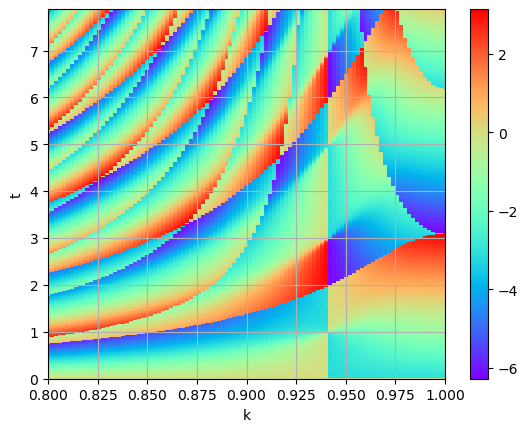

In [22]:
plt.pcolormesh(k/pi , t/tc , PGP , cmap = 'rainbow')
plt.colorbar()
#plt.grid()
plt.xlabel('k')
plt.ylabel('t')
# plt.clim(-8 , 0)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.yscale('log')
plt.xlim(0.8,1)
plt.grid()
# plt.ylim(10,4000)
plt.show()


In [29]:
min(PGP[500])

-2.8297043203252525

In [30]:
"""ROUGH WORK"""

'ROUGH WORK'

In [31]:
x = np.linspace(0,10, 1000)
y = np.linspace(0,1,1000)
pl = np.zeros((1000 , 1000))

for i in range(len(pl)):
    for j in range(len(pl[i])):
        pl[i,j] = x[i]*y[j]


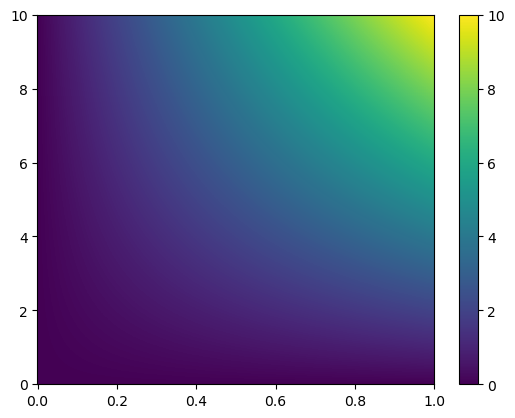

In [32]:
plt.pcolormesh(y , x , pl)
plt.colorbar()

In [33]:
#plt.plot(k/pi,np.angle(Gk[2]))

In [34]:
#plt.plot(k/pi , np.arctan(cos_delta_k*np.tan(Efk*t[2])))

In [35]:
"""END OF ROUGH WORK"""

'END OF ROUGH WORK'

In [36]:
"""Now defining nu =  integral from k = 0 to pi of dnu"""

nu = np.array(len(t)*[0.00])

for i in range(len(t)):
    nu[i] = (1/2*pi)*np.trapz(dnu[i,np.where(k>=0)] , k[np.where(k>=0)])
    

In [37]:
tc

0.5076729372855046

Text(0.5, 0, 'Time')

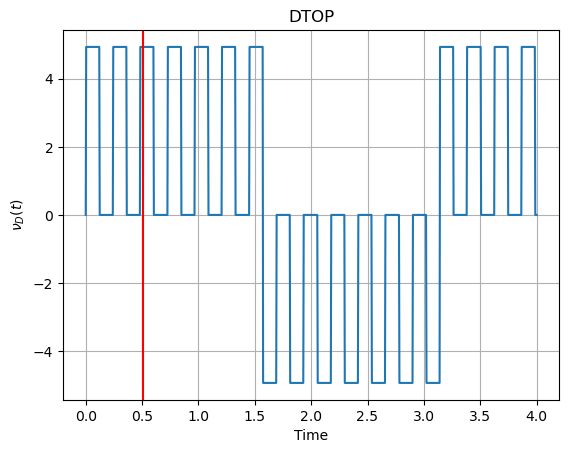

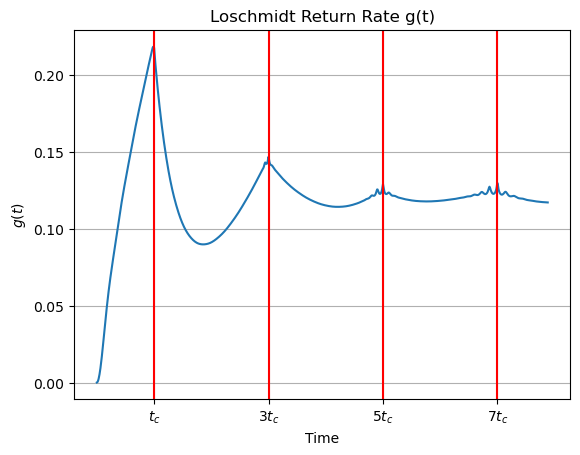

In [38]:
plt.plot(t , nu)
plt.ylabel(r'$\nu_{D}(t)$')
plt.xlabel('Time')
plt.grid()
# plt.xlim(0,1)
# plt.ylim(0,40)
#plt.axvline(tc)
plt.title("DTOP")
plt.axvline(tc , color='red')

plt.figure()
plt.plot(t,rate)
plt.grid()
plt.axvline(tc , color='red')
plt.axvline(3*tc , color='red')
plt.axvline(5*tc , color='red')
plt.axvline(7*tc , color='red')
plt.xticks([tc , 3*tc , 5*tc , 7*tc] , [r'$t_c$' , r'$3t_c$' , r'$5t_c$' , r'$7t_c$'])
plt.title("Loschmidt Return Rate g(t)")
plt.ylabel(r'$g(t)$')
plt.xlabel('Time')
#plt.xlim(0,1)

Text(0, 0.5, '$\\cos(\\Delta_k)$')

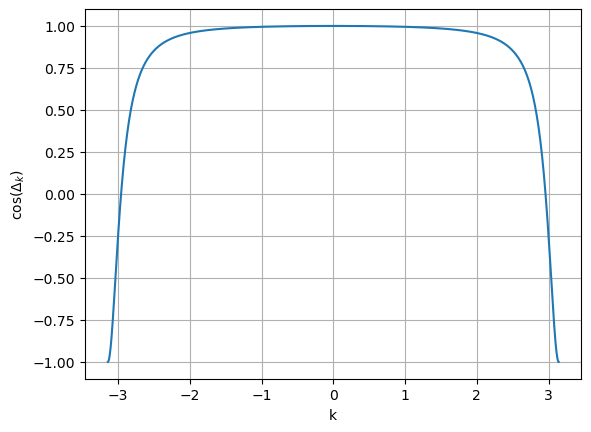

In [22]:
plt.plot(k , cos_delta_k)
plt.grid()
plt.xlabel("k")
plt.ylabel(r'$\cos(\Delta_k)$')

Text(0.5, 0, 'k')

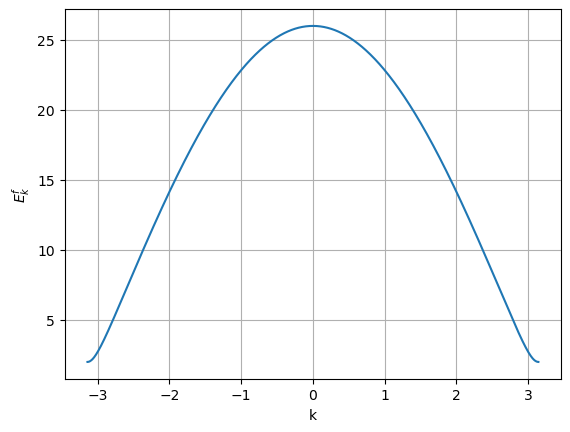

In [23]:
plt.plot(k , Efk)
plt.grid()
plt.ylabel(r'$E^f_k$')
plt.xlabel('k')

In [24]:
np.where(abs(cos_delta_k) == min(abs(cos_delta_k)))

(array([970], dtype=int64),)

In [25]:
pi/(2*Efk[25])

0.5503952748112202

In [ ]:
"""Rough work begins here"""

In [200]:
np.sqrt(1.95928417e-01**2 +  2.69672331e-01**2)

0.33333333270931587

In [201]:
Efk

array([ 1.        ,  1.00308073,  1.01226654,  1.02739334,  1.04820337,
        1.07436563,  1.10549922,  1.14119614,  1.18104136,  1.22462853,
        1.27157127,  1.32151029,  1.37411709,  1.42909513,  1.48617921,
        1.54513381,  1.60575071,  1.66784641,  1.73125948,  1.79584799,
        1.86148718,  1.92806727,  1.99549159,  2.06367485,  2.1325417 ,
        2.20202541,  2.27206675,  2.34261306,  2.41361741,  2.48503784,
        2.55683677,  2.62898048,  2.70143859,  2.77418373,  2.84719112,
        2.92043832,  2.99390493,  3.06757239,  3.14142376,  3.21544355,
        3.28961755,  3.36393273,  3.43837709,  3.51293957,  3.58760995,
        3.66237876,  3.73723722,  3.81217718,  3.88719106,  3.96227176,
        4.03741267,  4.1126076 ,  4.18785075,  4.26313666,  4.33846021,
        4.41381657,  4.48920119,  4.56460974,  4.64003816,  4.71548258,
        4.79093933,  4.86640492,  4.94187603,  5.01734949,  5.09282228,
        5.16829151,  5.24375441,  5.31920833,  5.39465072,  5.47

In [202]:
cos_delta_k

array([-1.        , -0.99516543, -0.98089725, -0.95786851, -0.92709857,
       -0.88982742, -0.84738424, -0.80107342, -0.75209183, -0.70147989,
       -0.65010222, -0.59864974, -0.54765521, -0.49751519, -0.44851381,
       -0.40084542, -0.3546345 , -0.30995241, -0.266831  , -0.22527326,
       -0.18526164, -0.14676434, -0.10974002, -0.07414129, -0.03991723,
       -0.00701528,  0.02461752,  0.05503359,  0.08428423,  0.11241919,
        0.13948646,  0.16553212,  0.19060026,  0.21473301,  0.23797058,
        0.26035127,  0.28191156,  0.30268623,  0.32270837,  0.34200951,
        0.3606197 ,  0.37856757,  0.39588041,  0.41258425,  0.42870393,
        0.44426315,  0.45928453,  0.47378969,  0.48779926,  0.50133299,
        0.51440972,  0.52704748,  0.53926352,  0.55107434,  0.5624957 ,
        0.57354272,  0.58422986,  0.59457094,  0.60457922,  0.61426738,
        0.62364758,  0.63273146,  0.64153016,  0.65005438,  0.65831434,
        0.66631986,  0.67408035,  0.68160482,  0.68890192,  0.69

In [203]:
di_normed[30] , df_normed[30]

(array([0.90237501, 0.43095167]), array([-0.30086958,  0.9536653 ]))

In [204]:
di[30]/np.sqrt(np.sum(di[30]**2)) , df[30]/np.sqrt(np.sum(df[30]**2))

(array([0.90237501, 0.43095167]), array([-0.30086958,  0.9536653 ]))

In [205]:
np.where(abs(cos_delta_k) < 0.01)

(array([ 25, 974], dtype=int64),)

In [206]:
cos_delta_k[25]

-0.007015277050193391

In [207]:
cos_delta_k

array([-1.        , -0.99516543, -0.98089725, -0.95786851, -0.92709857,
       -0.88982742, -0.84738424, -0.80107342, -0.75209183, -0.70147989,
       -0.65010222, -0.59864974, -0.54765521, -0.49751519, -0.44851381,
       -0.40084542, -0.3546345 , -0.30995241, -0.266831  , -0.22527326,
       -0.18526164, -0.14676434, -0.10974002, -0.07414129, -0.03991723,
       -0.00701528,  0.02461752,  0.05503359,  0.08428423,  0.11241919,
        0.13948646,  0.16553212,  0.19060026,  0.21473301,  0.23797058,
        0.26035127,  0.28191156,  0.30268623,  0.32270837,  0.34200951,
        0.3606197 ,  0.37856757,  0.39588041,  0.41258425,  0.42870393,
        0.44426315,  0.45928453,  0.47378969,  0.48779926,  0.50133299,
        0.51440972,  0.52704748,  0.53926352,  0.55107434,  0.5624957 ,
        0.57354272,  0.58422986,  0.59457094,  0.60457922,  0.61426738,
        0.62364758,  0.63273146,  0.64153016,  0.65005438,  0.65831434,
        0.66631986,  0.67408035,  0.68160482,  0.68890192,  0.69

In [208]:
Efk

array([ 1.        ,  1.00308073,  1.01226654,  1.02739334,  1.04820337,
        1.07436563,  1.10549922,  1.14119614,  1.18104136,  1.22462853,
        1.27157127,  1.32151029,  1.37411709,  1.42909513,  1.48617921,
        1.54513381,  1.60575071,  1.66784641,  1.73125948,  1.79584799,
        1.86148718,  1.92806727,  1.99549159,  2.06367485,  2.1325417 ,
        2.20202541,  2.27206675,  2.34261306,  2.41361741,  2.48503784,
        2.55683677,  2.62898048,  2.70143859,  2.77418373,  2.84719112,
        2.92043832,  2.99390493,  3.06757239,  3.14142376,  3.21544355,
        3.28961755,  3.36393273,  3.43837709,  3.51293957,  3.58760995,
        3.66237876,  3.73723722,  3.81217718,  3.88719106,  3.96227176,
        4.03741267,  4.1126076 ,  4.18785075,  4.26313666,  4.33846021,
        4.41381657,  4.48920119,  4.56460974,  4.64003816,  4.71548258,
        4.79093933,  4.86640492,  4.94187603,  5.01734949,  5.09282228,
        5.16829151,  5.24375441,  5.31920833,  5.39465072,  5.47

In [209]:
min(abs(cos_delta_k))

0.007015277050193391

In [210]:
np.where(abs(cos_delta_k) == min(abs(cos_delta_k)))

(array([25], dtype=int64),)

In [211]:
cos_delta_k[80]

0.7614368924068418

In [212]:
cos_delta_k[27]

0.05503359242062322

In [213]:
Efk

array([ 1.        ,  1.00308073,  1.01226654,  1.02739334,  1.04820337,
        1.07436563,  1.10549922,  1.14119614,  1.18104136,  1.22462853,
        1.27157127,  1.32151029,  1.37411709,  1.42909513,  1.48617921,
        1.54513381,  1.60575071,  1.66784641,  1.73125948,  1.79584799,
        1.86148718,  1.92806727,  1.99549159,  2.06367485,  2.1325417 ,
        2.20202541,  2.27206675,  2.34261306,  2.41361741,  2.48503784,
        2.55683677,  2.62898048,  2.70143859,  2.77418373,  2.84719112,
        2.92043832,  2.99390493,  3.06757239,  3.14142376,  3.21544355,
        3.28961755,  3.36393273,  3.43837709,  3.51293957,  3.58760995,
        3.66237876,  3.73723722,  3.81217718,  3.88719106,  3.96227176,
        4.03741267,  4.1126076 ,  4.18785075,  4.26313666,  4.33846021,
        4.41381657,  4.48920119,  4.56460974,  4.64003816,  4.71548258,
        4.79093933,  4.86640492,  4.94187603,  5.01734949,  5.09282228,
        5.16829151,  5.24375441,  5.31920833,  5.39465072,  5.47

In [214]:
di[10]/(np.sqrt(di[10,0]**2 + di[10,1]**2)) , df[10]/(np.sqrt(df[10,0]**2 + df[10,1]**2))

(array([0.98638384, 0.16445946]), array([-0.76621431,  0.64258511]))

In [215]:
np.array([complex(1,2) , 0])

array([1.+2.j, 0.+0.j])

In [216]:
pi/(2*Efk[20])

0.8438394563456443

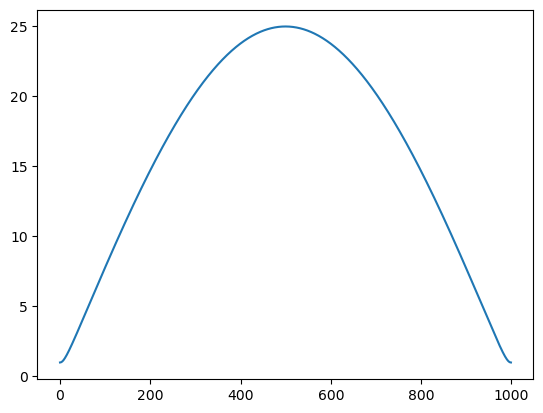

In [218]:
plt.plot(Efk)

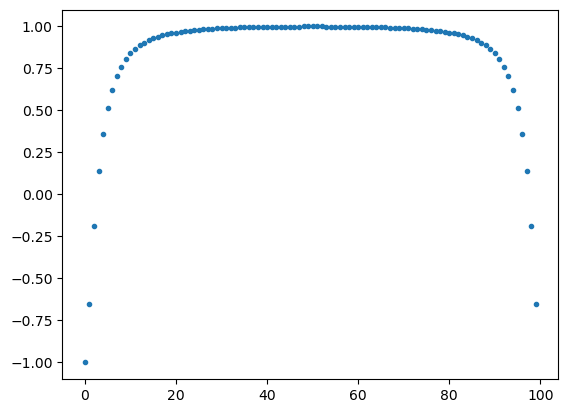

In [174]:
vp = v(quench=True)
vn = v()
wp = w(quench=True)
wn = w()

dd = vn*vp + wn*wp + (wn*vp + vn*wp)*np.cos(k)
denom = Eik*Efk

plt.plot(dd/denom , '.')

In [170]:
(wn*vp + vn*wp)

TypeError: can only concatenate tuple (not "int") to tuple

In [173]:
min(abs(cos_delta_k))

0.1386895361573503

In [21]:
tc

0.5041374238304446